# CS 1656 – Introduction to Data Science (Spring 2023) 

## Instructor: Alexandros Labrinidis
## Teaching Assistant: Evangelos Karageorgos

## Term Project 

**Released: March 21, 2023**

**Due: April 17, 2023**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` and a python file, called `calculations.py`, that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from calculations import Calculations
from sys import maxsize
from collections import defaultdict
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from math import isnan
import seaborn as sns 
sns.set_theme()

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

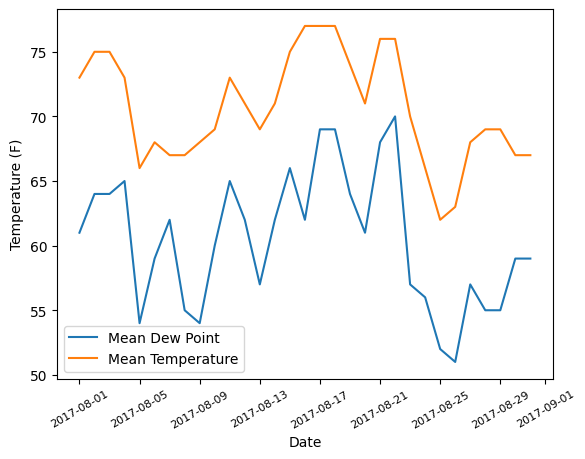

In [3]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])
plt.xticks(rotation=30, fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Running Calculations

In [4]:
calculations = Calculations(['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv', 'HealthyRideRentals2021-Q3.csv'])


### Task 1.1

In [5]:
trips = calculations.get_trips()
trips.head(5)

,Bikeid,Starttime,Trip id,From station id,To station id,day,hour,month,date
0,70782,2021-01-12 12:48:00,111375309,49641.0,1061.0,01/12/2021,12,01/2021,2021-01-12
1,70578,2021-01-13 09:32:00,111390480,49391.0,1064.0,01/13/2021,09,01/2021,2021-01-13
2,70935,2021-01-15 17:43:00,111441111,1072.0,1072.0,01/15/2021,17,01/2021,2021-01-15
3,70910,2021-01-20 16:00:00,111529394,1068.0,1032.0,01/20/2021,16,01/2021,2021-01-20
4,70910,2021-01-24 14:40:00,111609524,1032.0,1056.0,01/24/2021,14,01/2021,2021-01-24


### Task 1.1

In [6]:
daily_counts = calculations.get_daily_counts()
daily_counts.head(10)

,day,station_id,fromCNT,toCNT,rebalCNT
0,01/01/2021,1002,2,2,0
1,01/01/2021,1010,2,0,0
2,01/01/2021,1024,2,2,0
3,01/01/2021,1028,2,2,0
4,01/01/2021,1032,2,0,0
5,01/01/2021,1059,2,2,0
6,01/01/2021,1062,4,4,0
7,01/01/2021,1094,4,0,0
8,01/01/2021,49301,2,4,0
9,01/01/2021,49671,2,0,0


### Task 1.2

In [7]:
monthly_counts = calculations.get_monthly_counts()
monthly_counts.head(10)

,month,station_id,fromCNT,toCNT,rebalCNT
0,01/2021,1000,46,36,2
1,01/2021,1001,36,34,0
2,01/2021,1002,54,42,3
3,01/2021,1003,4,0,0
4,01/2021,1004,40,32,3
5,01/2021,1005,12,4,0
6,01/2021,1006,16,6,1
7,01/2021,1007,18,14,1
8,01/2021,1009,16,4,0
9,01/2021,1010,94,54,12


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [8]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = "09/2021"
filter_stationID = 49881


### Task 2.1

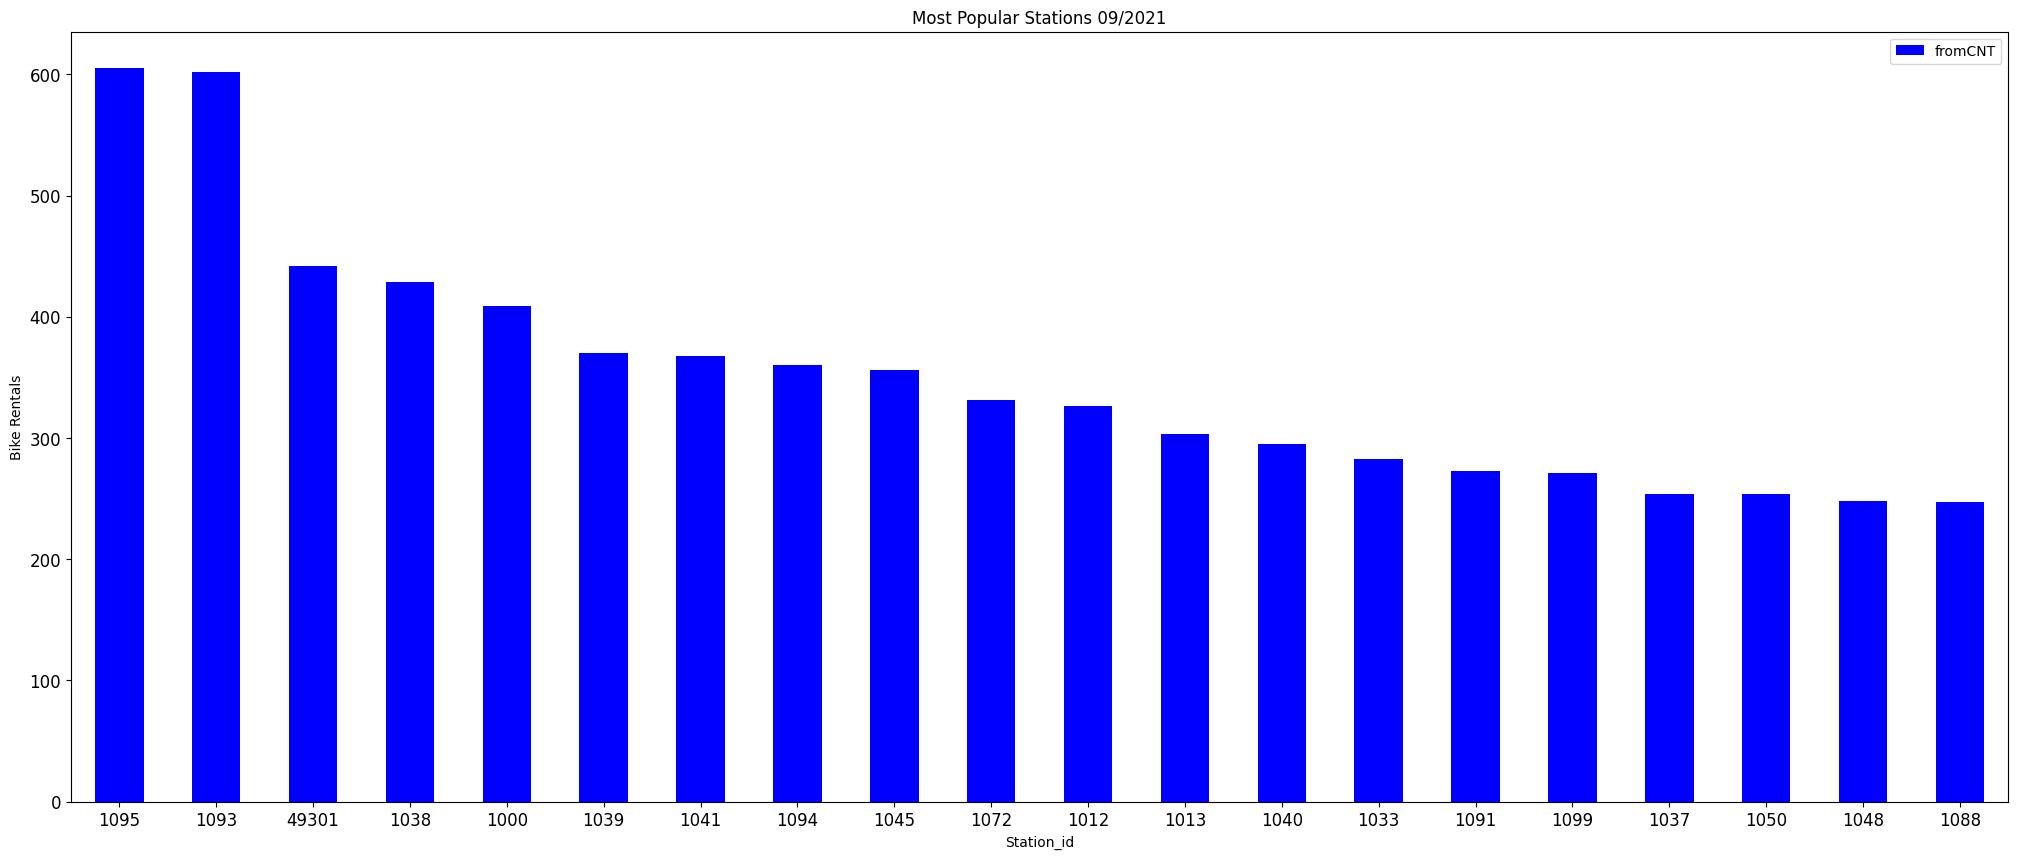

In [9]:

filterDf = {}

for (colname,coldata) in monthly_counts.iteritems():
    if colname=='month':
        for index,row in enumerate(coldata):
            
            if row == filter_month and not isnan(monthly_counts.iloc[index]['station_id']):
                filterDf[monthly_counts.iloc[index]['station_id']] = monthly_counts.iloc[index]['fromCNT']
               
ranks = sorted(filterDf.items(), key=lambda pair: pair[1], reverse=True)
x = []
y = []
for rank in ranks:
    x.append(rank[0])
    y.append(rank[1])
if len(x)>20 and len(y)>20:
    x = x[:20]
    y = y[:20]

curDf = pd.DataFrame({'station_id': x, 'fromCNT':y})
ax = curDf.plot.bar(x='station_id', y='fromCNT', rot=0, figsize=(25,10), color='blue', title=f"Most Popular Stations {filter_month}",
                    xlabel='Station_id', ylabel='Bike Rentals', fontsize=12)

### Task 2.2

/Users/iansnyder/Desktop/Pitt/CS/CS-1656/TermProject/project56-iansnyder333/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


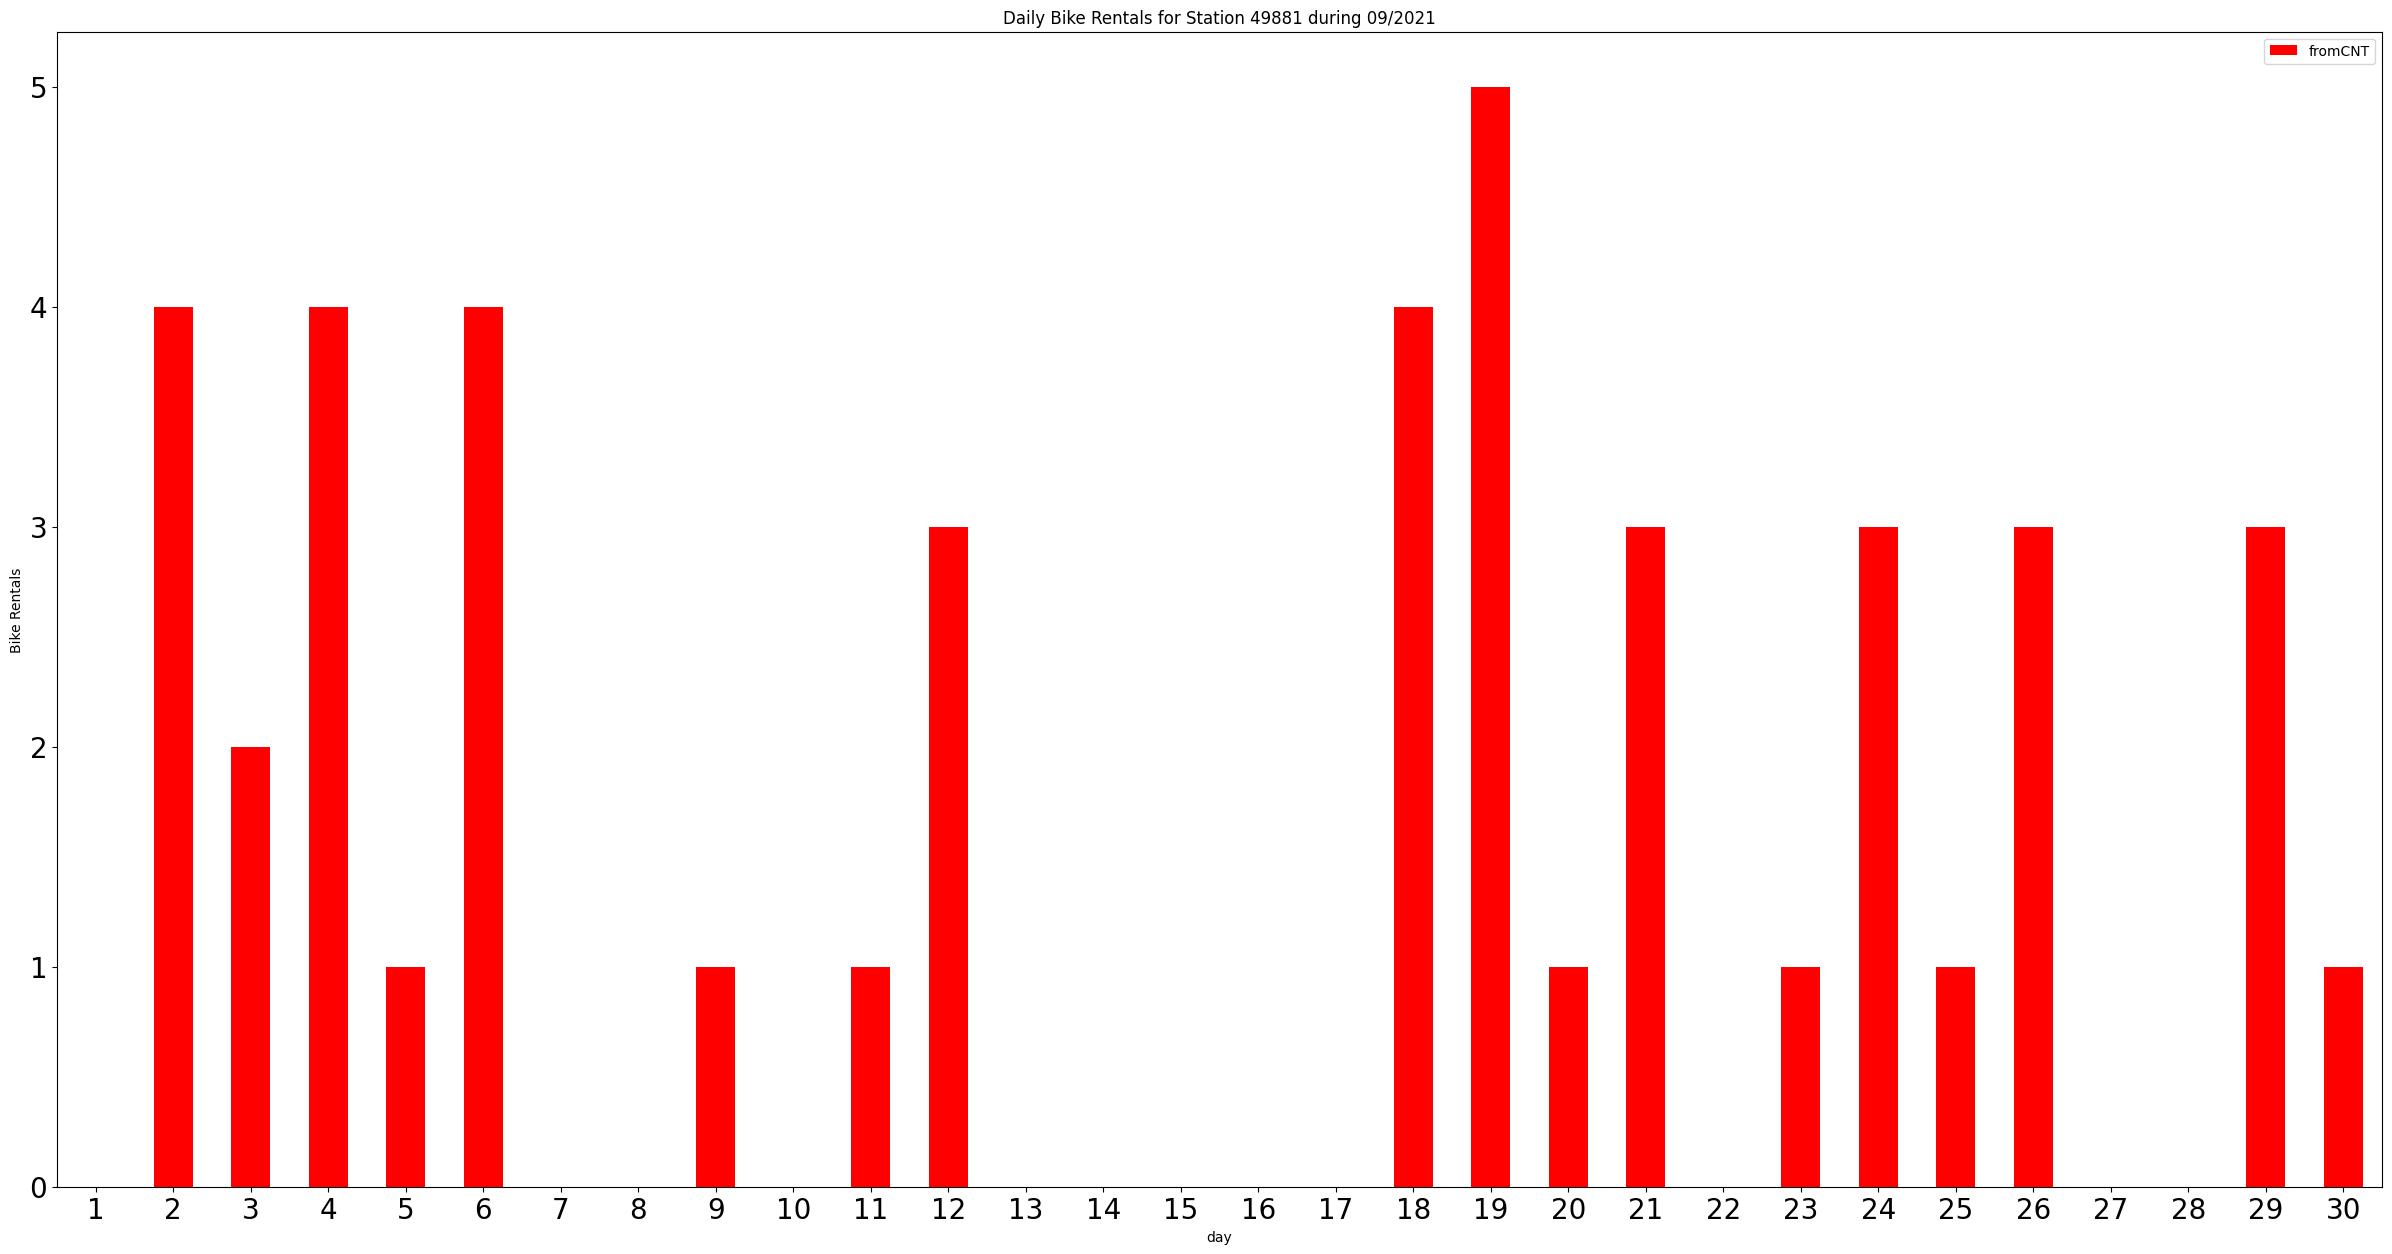

In [10]:

m = filter_month.split('/')
month = int(m[0])
year = int(m[1])
first_day = datetime.date(year, month, 1)
if month == 12:
    next_month = datetime.date(year + 1, 1, 1)
else:
    next_month = datetime.date(year, month + 1, 1)
num_days = (next_month - first_day).days
x = [i for i in range(1,num_days+1)]
y = [0 for i in range(1, num_days+1)]
df = daily_counts.copy()
df['day'] = pd.to_datetime(df['day'], format='%m/%d/%Y')
df['month'] = df['day'].dt.strftime('%m/%Y')




result = df[(df['month'] == filter_month) & (
    df['station_id'] == filter_stationID)]
result['d'] = result['day'].dt.strftime('%d').astype(int)
tes = {}
for i in range(1, num_days+1):
    tes[i] = 0
result = result.drop_duplicates()
result =result.set_index('d')

    
for ind, val in result['fromCNT'].items():
    tes[ind] += val
#result['fromCNT'].iloc[])
x = list(tes.keys())
y = list(tes.values())
curDf = pd.DataFrame({'Date': x, 'fromCNT': y})
ax = curDf.plot.bar(x='Date', y='fromCNT', rot=0, figsize=(30, 15), title=f"Daily Bike Rentals for Station {filter_stationID} during {filter_month}",
                    xlabel='day', ylabel='Bike Rentals', fontsize=20, color='red')


### Task 2.3

/Users/iansnyder/Desktop/Pitt/CS/CS-1656/TermProject/project56-iansnyder333/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


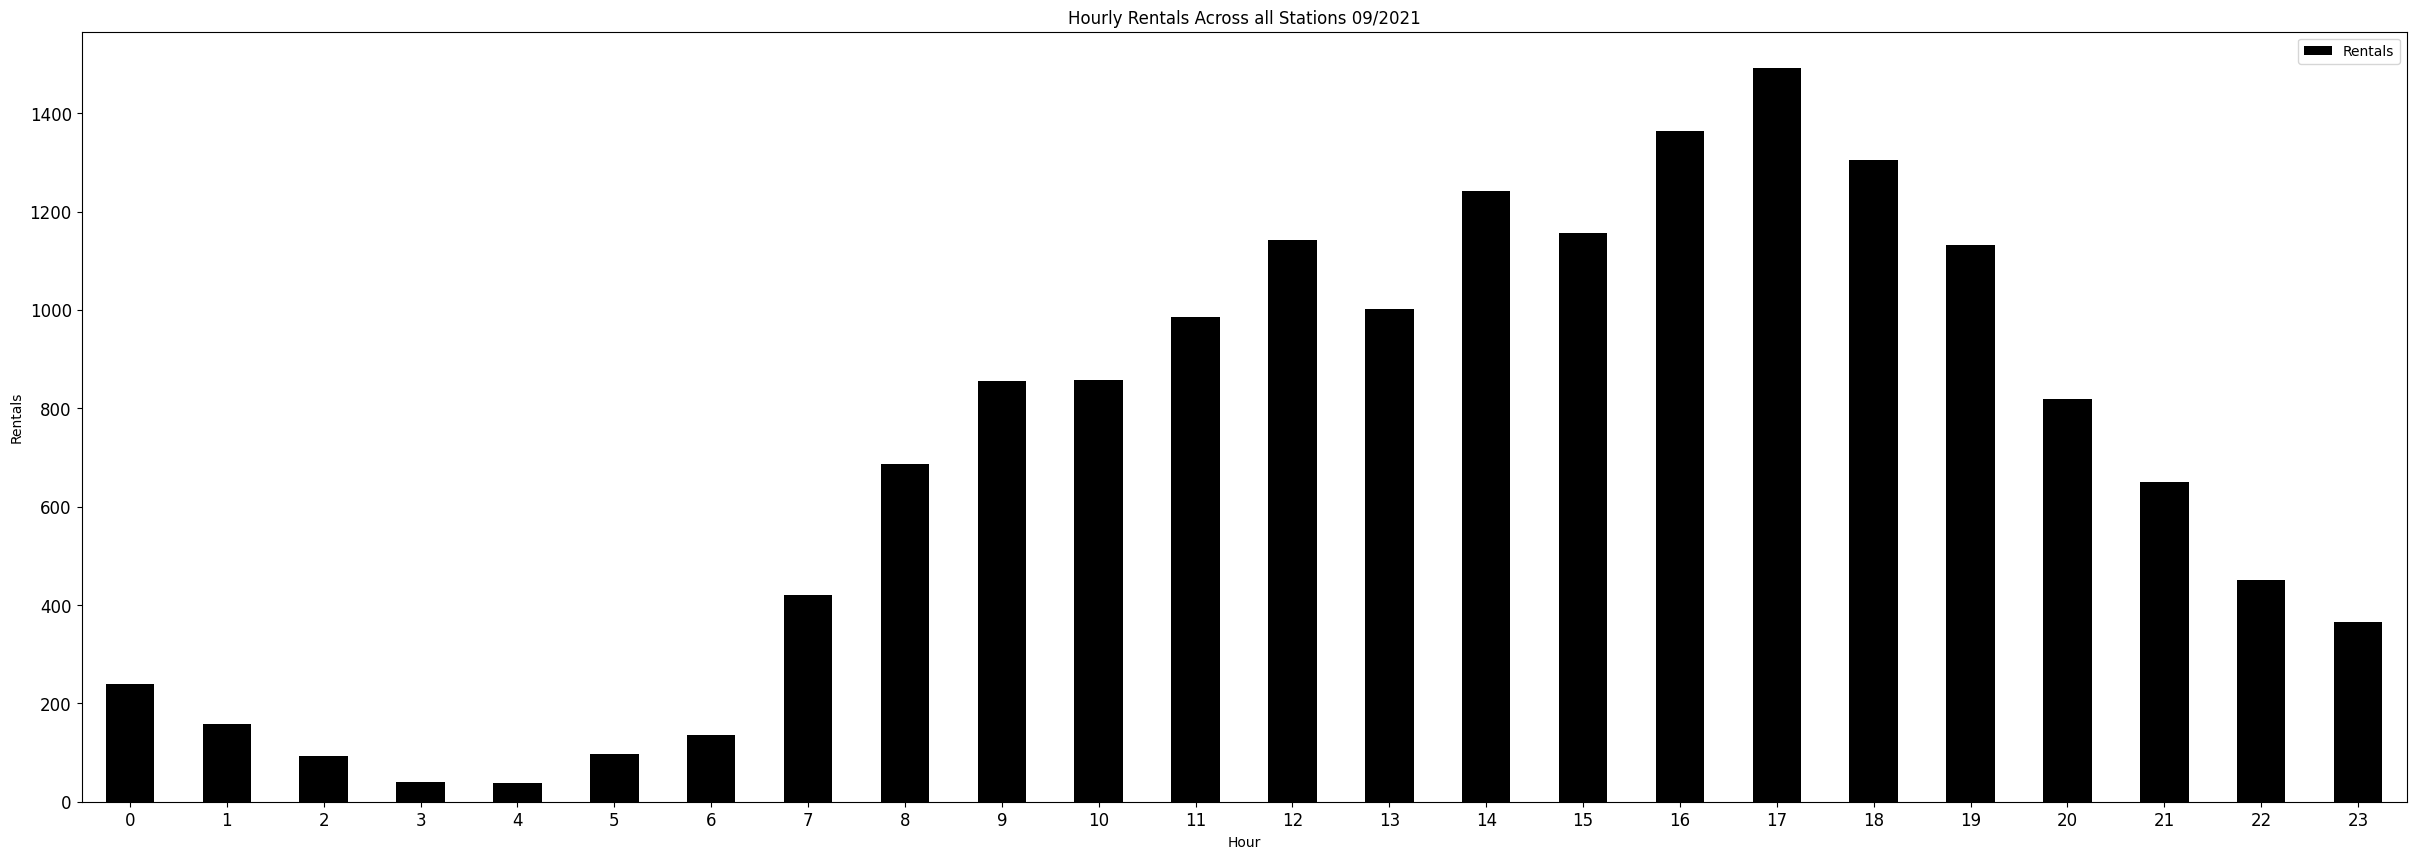

In [11]:
'''
* **Task 2.3** For the filter_month (e.g., April) show a graph that shows the distribution of bike rentals throughout the day,
 for all stations. Y axis should be the fromCNT for all stations in the filter_month, X axis would be the different hours in a day (i.e., 0 - 23).
'''
fil_small = trips.loc[trips['month']==filter_month].copy()

df_small = fil_small[['From station id', 'hour']]
freq = [1 for i in range(len(df_small))]
df_small['freq']=freq

distribution = df_small.groupby(['hour'], dropna=True)['freq'].count().reset_index().values.tolist()

x = [i for i in range(24)]
y = [i for i in range(24)]
for lis in distribution:

    y[int(lis[0])] = lis[1]
    
curDf = pd.DataFrame({'Hour': x, 'Rentals':y})
ax = curDf.plot.bar(x='Hour', y='Rentals', rot=0, figsize=(30,10), title=f"Hourly Rentals Across all Stations {filter_month}", xlabel='Hour', ylabel='Rentals', fontsize=12, color='black')





### Task 2.4

/Users/iansnyder/Desktop/Pitt/CS/CS-1656/TermProject/project56-iansnyder333/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/iansnyder/Desktop/Pitt/CS/CS-1656/TermProject/project56-iansnyder333/.venv/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


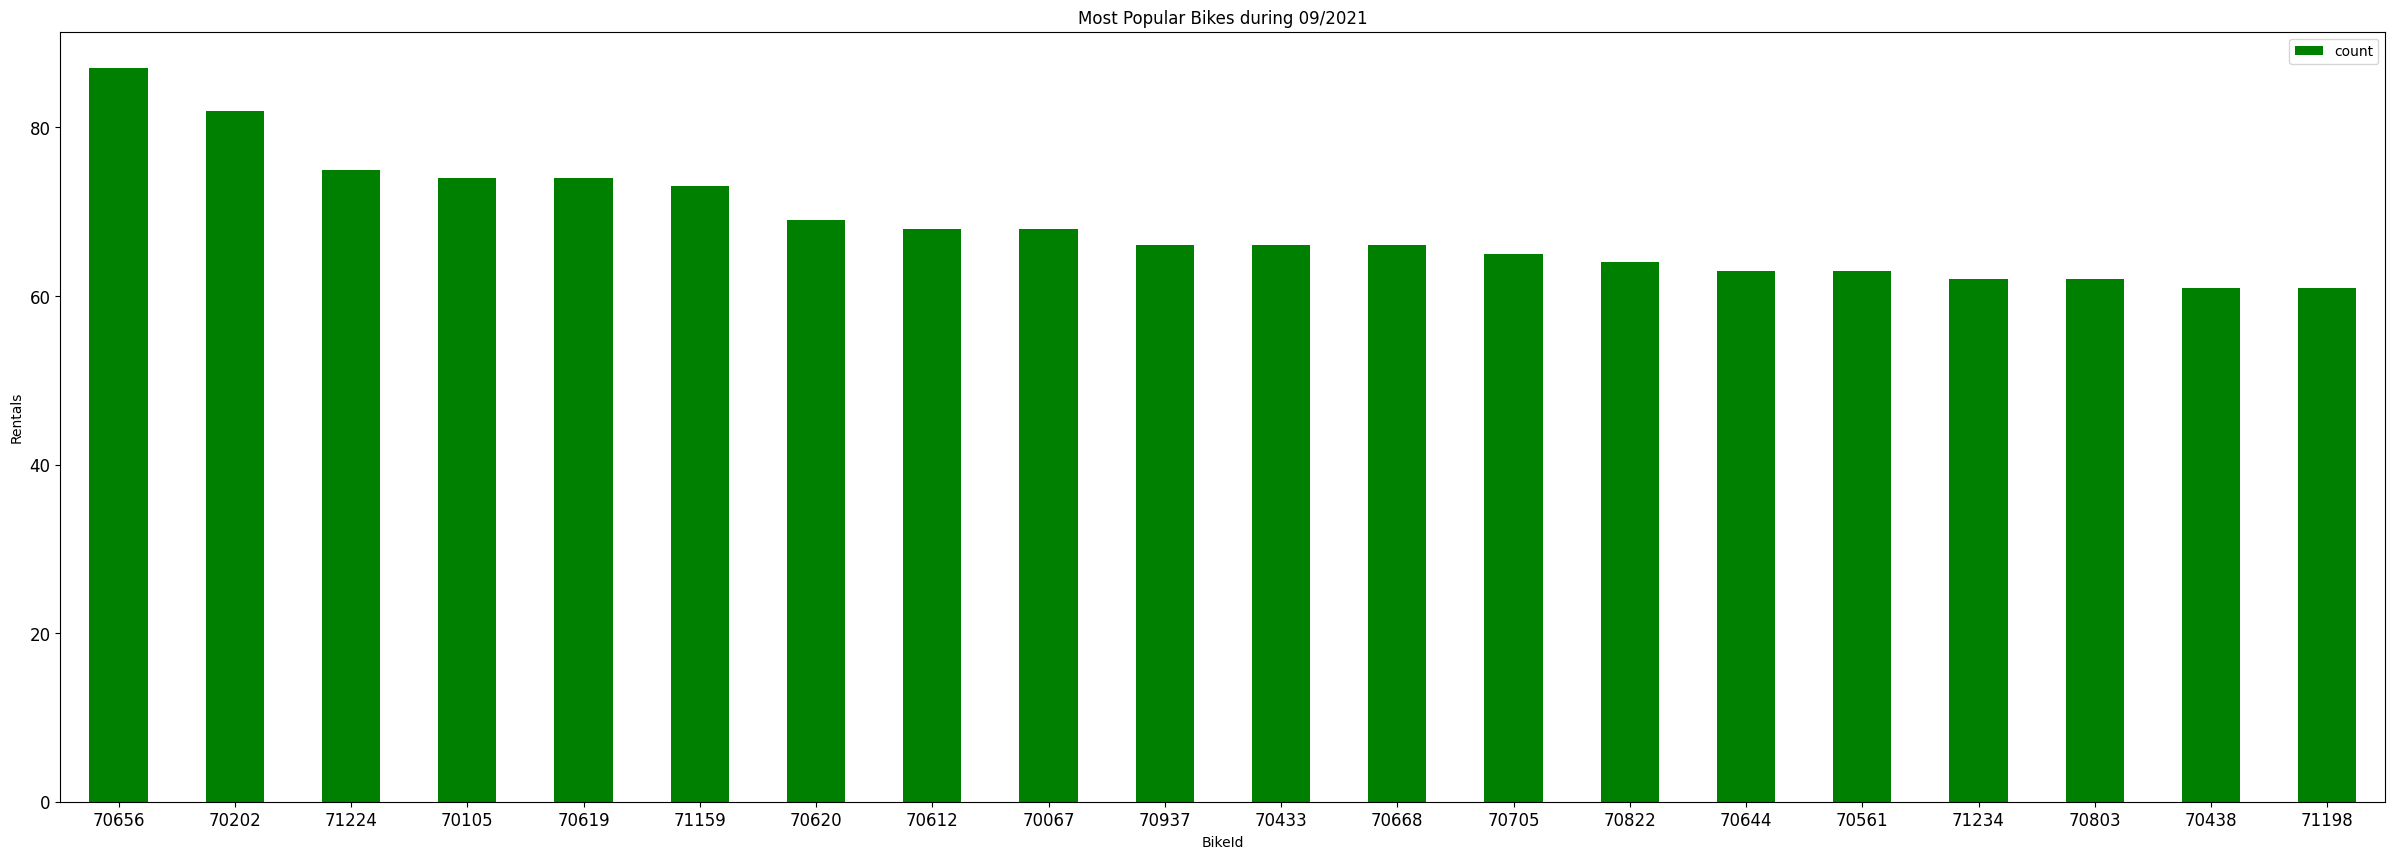

In [12]:


df = trips[['Bikeid', 'day']].copy()
df['day'] = pd.to_datetime(df['day'], format='%m/%d/%Y')
df['month'] = df['day'].dt.strftime('%m/%Y')
result = df[df['month'] == filter_month]
result['count'] = result.groupby(['Bikeid'])['day'].transform('count')
result.drop_duplicates(subset=['Bikeid'], inplace=True)
res = result.sort_values('count', ascending=False)
curDf = res[0:20].copy()
ax = curDf.plot.bar(x='Bikeid', y='count', rot=0, figsize=(
    30, 10), title=f"Most Popular Bikes during {filter_month}", xlabel='BikeId', ylabel='Rentals', fontsize=12, color='green')


---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

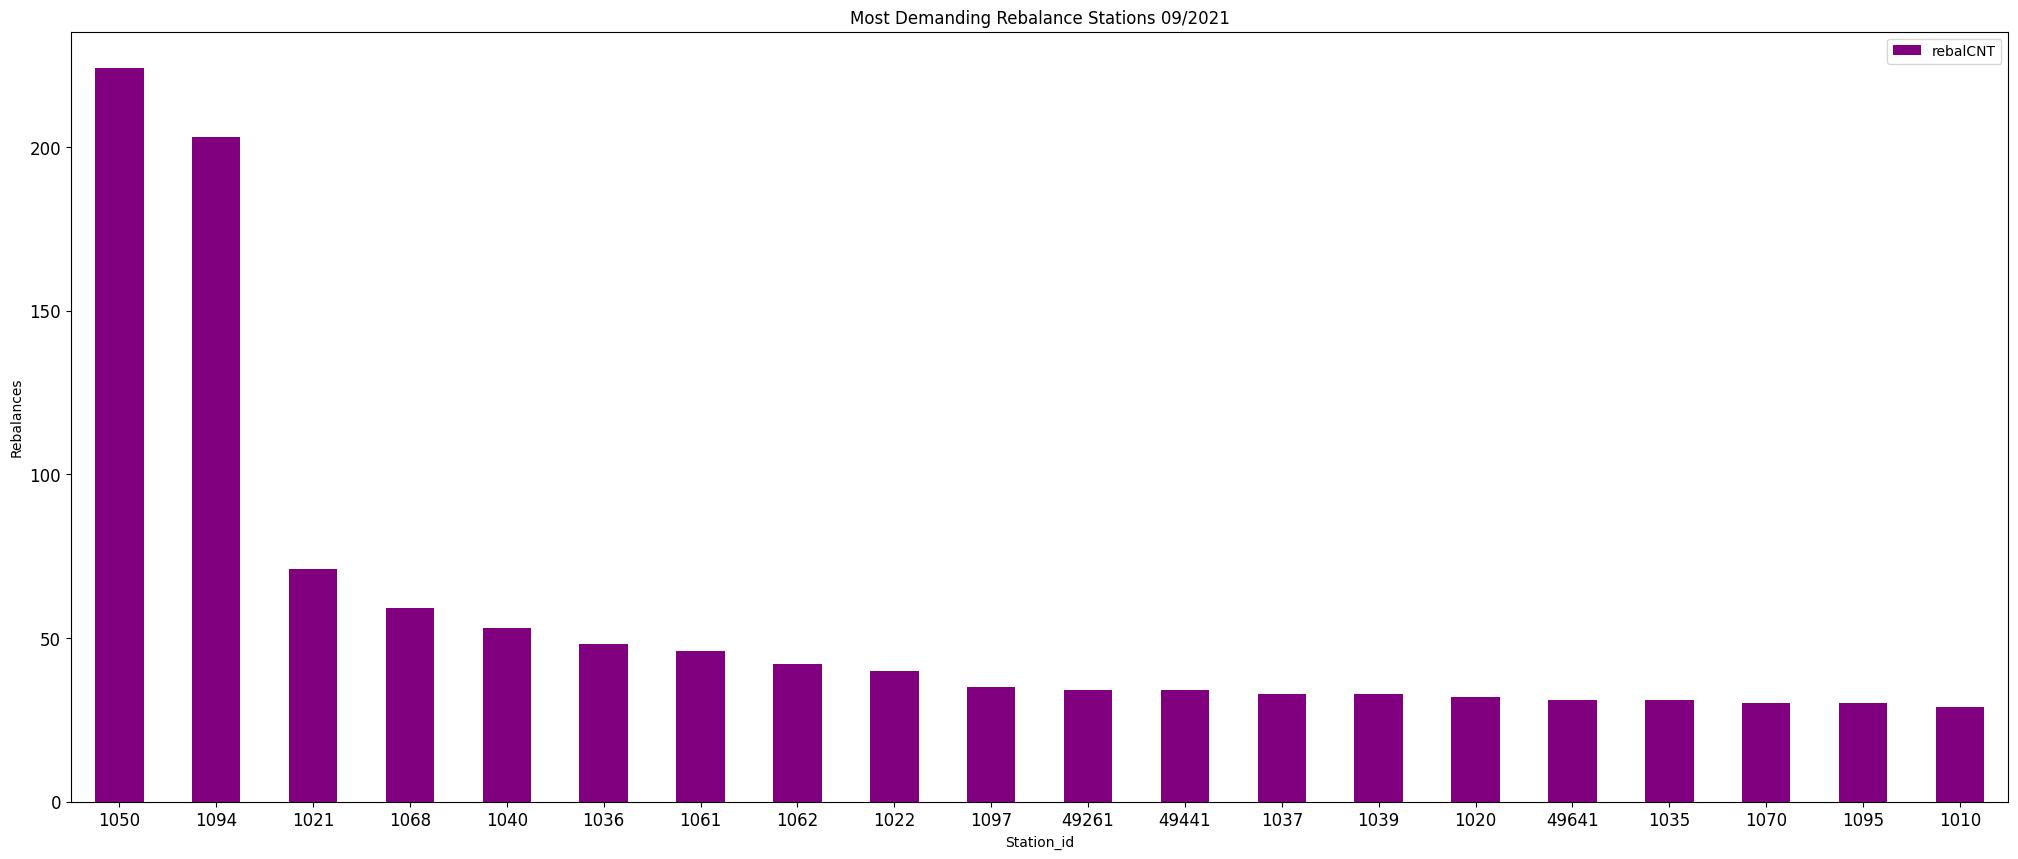

In [13]:

df = monthly_counts[monthly_counts['month']==filter_month]

ranks = df.sort_values('rebalCNT', ascending=False)[0:20].copy()
ax = ranks.plot.bar(x='station_id', y='rebalCNT', rot=0, figsize=(25, 10), color='purple', title=f"Most Demanding Rebalance Stations {filter_month}",
                    xlabel='Station_id', ylabel='Rebalances', fontsize=12)



### Task 3.2

/Users/iansnyder/Desktop/Pitt/CS/CS-1656/TermProject/project56-iansnyder333/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


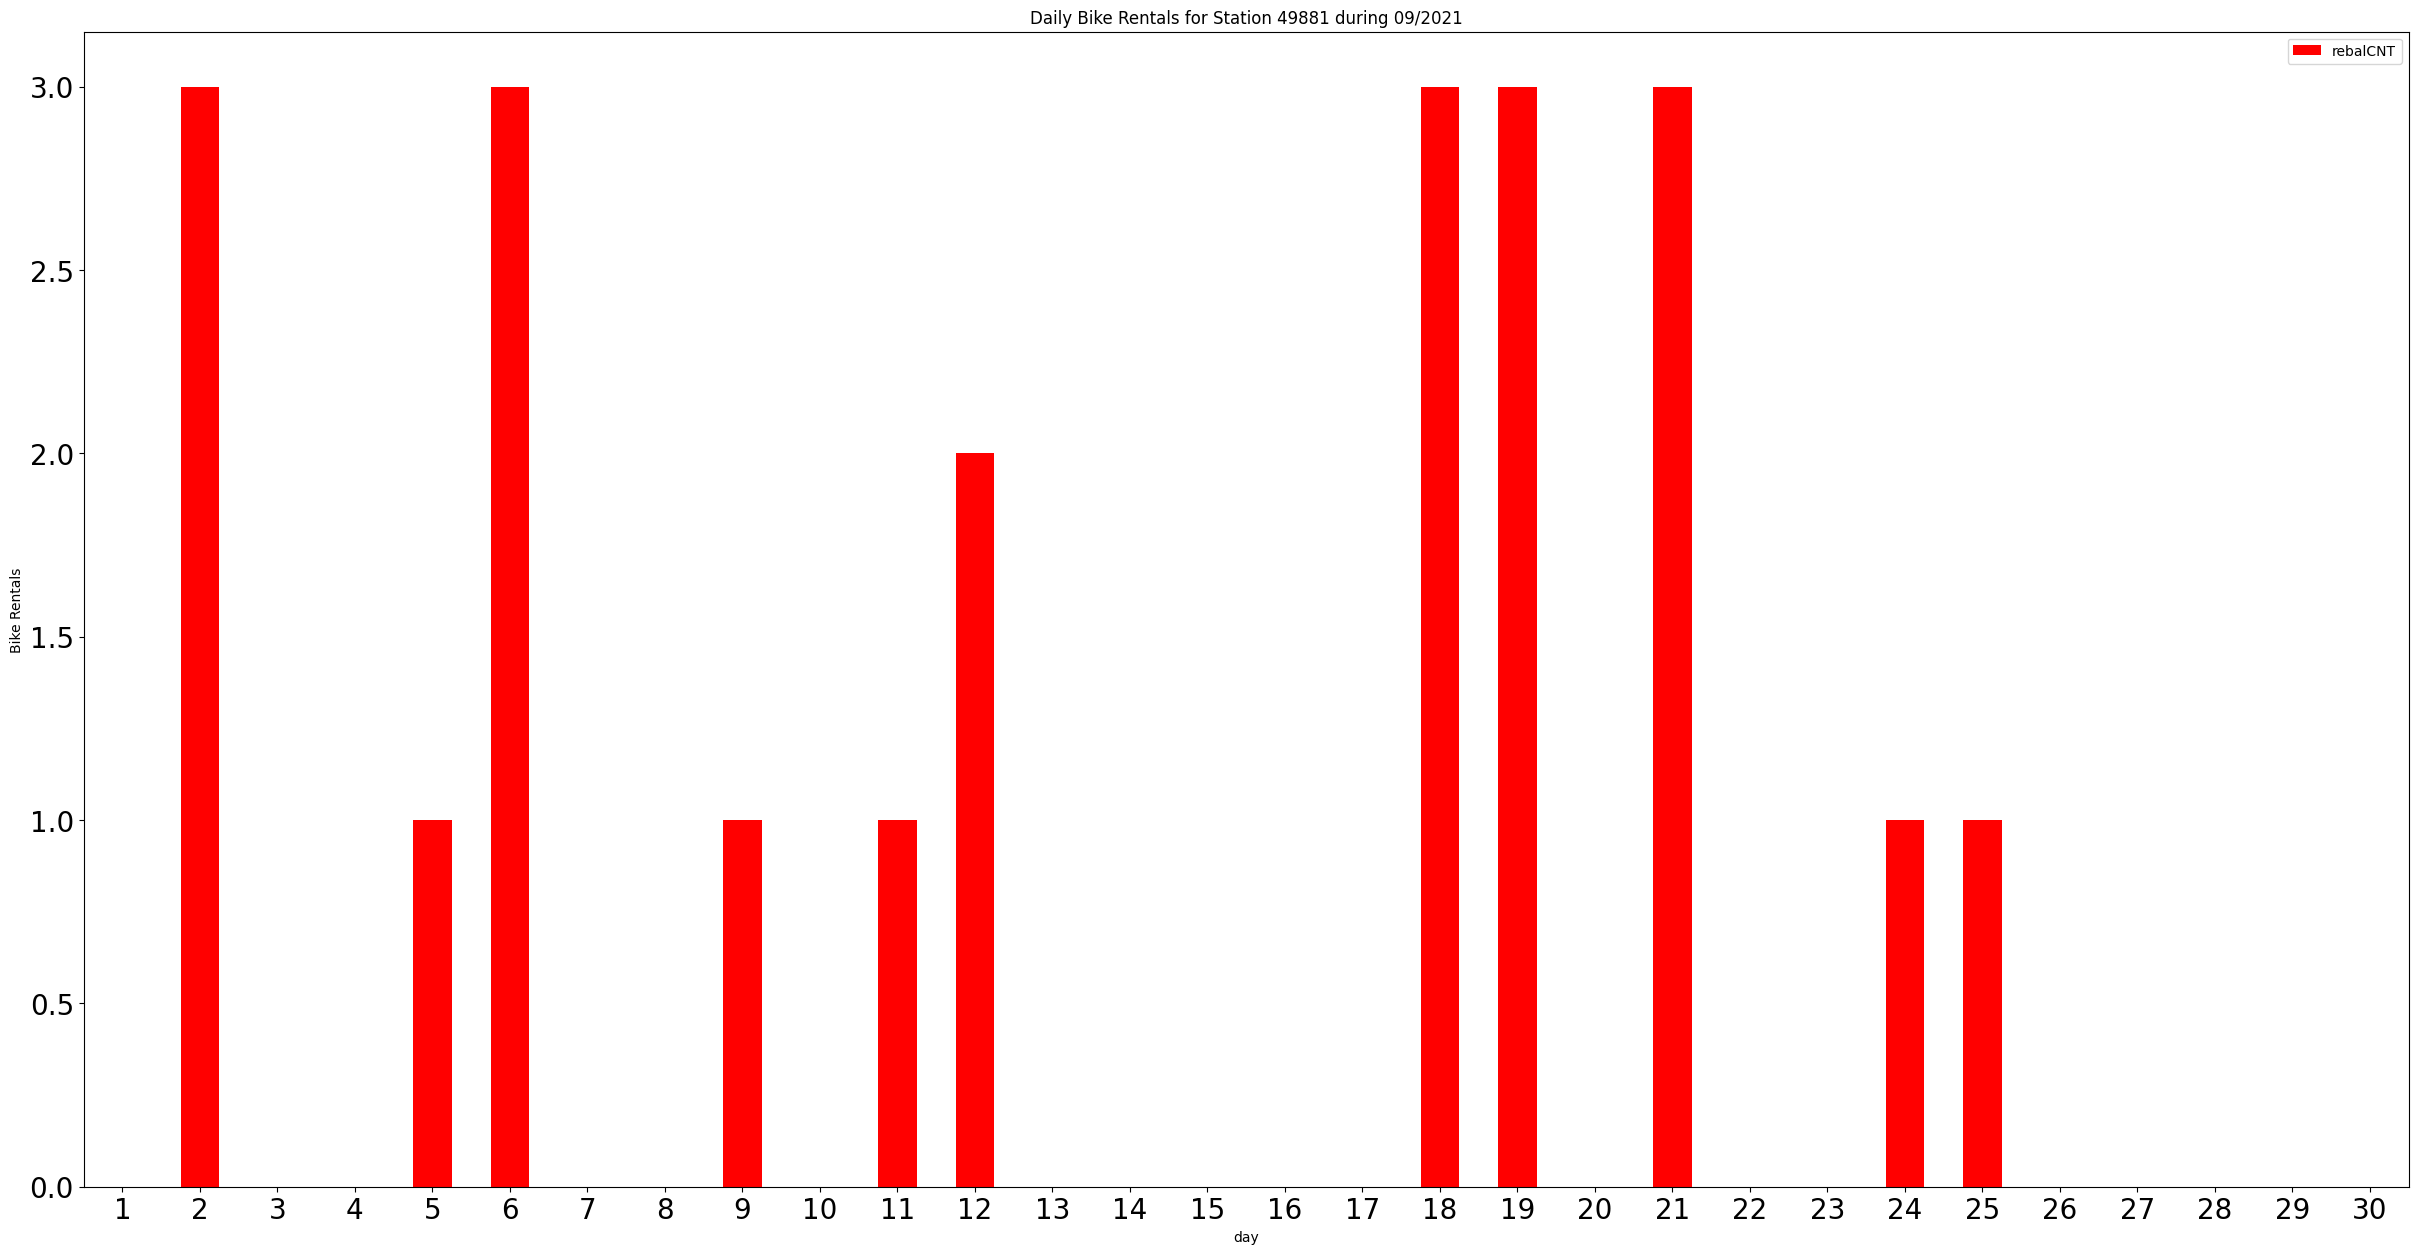

In [14]:
'''
filterDf = {}
m = filter_month.split('/')
month = m[0]
year = m[1]
for (colname,coldata) in daily_counts.iteritems():
    if colname=='day':
        for i,d in enumerate(coldata):
            c = d.split('/')
            if c[0]==month and c[2]==year and daily_counts.iloc[i]['station_id']==filter_stationID:
                filterDf[c[1]] = daily_counts.iloc[i]['rebalCNT']
x = []
y = []
for keys,vals in filterDf.items():
    x.append(keys)
    y.append(vals)
curDf = pd.DataFrame({'Date': x, 'rebalCNT':y})
ax = curDf.plot.bar(x='Date', y='rebalCNT', rot=0, figsize=(30,10), title=f"Daily Rebalances at {filter_stationID} during {filter_month}",
                    xlabel='Day', ylabel='Rebalances', fontsize=12, color='orange')
'''
m = filter_month.split('/')
month = int(m[0])
year = int(m[1])
first_day = datetime.date(year, month, 1)
if month == 12:
    next_month = datetime.date(year + 1, 1, 1)
else:
    next_month = datetime.date(year, month + 1, 1)
num_days = (next_month - first_day).days
x = [i for i in range(1, num_days+1)]
y = [0 for i in range(1, num_days+1)]
df = daily_counts.copy()
df['day'] = pd.to_datetime(df['day'], format='%m/%d/%Y')
df['month'] = df['day'].dt.strftime('%m/%Y')


result = df[(df['month'] == filter_month) & (
    df['station_id'] == filter_stationID)]
result['d'] = result['day'].dt.strftime('%d').astype(int)

tes = {}
for i in range(1,num_days+1):
    tes[i]=0
result = result.drop_duplicates()
result = result.set_index('d')
for ind, val in result['rebalCNT'].items():
    tes[ind]+=val
    


# result['fromCNT'].iloc[])
x = list(tes.keys())
y = list(tes.values())
curDf = pd.DataFrame({'day': x, 'rebalCNT': y})
ax = curDf.plot.bar(x='day', y='rebalCNT', rot=0, figsize=(30, 15), title=f"Daily Bike Rentals for Station {filter_stationID} during {filter_month}",
                    xlabel='day', ylabel='Bike Rentals', fontsize=20, color='red')


---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [18]:
#Create DataStructure
datastruc = defaultdict(lambda: defaultdict(list))
y = defaultdict(list)

for (colname,coldata) in monthly_counts.iteritems():
    if colname=='month':
        for index,row in enumerate(coldata):
            #print(row.split('/')[0])
            m = str(row.split('/')[0])
           
            if m == '01' or m == '02' or m == '03' and not isnan(monthly_counts.iloc[index]['station_id']):
                
                datastruc[monthly_counts.iloc[index]['station_id']][row.split('/')[0]].extend([('fromCNT',monthly_counts.iloc[index]['fromCNT']), ('rebalCNT', monthly_counts.iloc[index]['rebalCNT'])])
        
for keys,values in datastruc.items():
    if isnan(keys):
        print(keys,values)
        continue 
    else:
        for v in list(values.values()):
            
            for i in v:
                
                y[keys].append(float(i[1]))

z = []
for vals in y.values():
    if len(vals)==6:
        z.append(vals)

matrix = np.array(z)

k_means = KMeans(n_clusters=7, init='k-means++', random_state=5000)
k_means.fit(matrix)
l = k_means.labels_
k1 = l.tolist()

k_means = KMeans(n_clusters=10, init='k-means++', random_state=5000)
k_means.fit(matrix)
l = k_means.labels_
k2 = l.tolist()

k_means = KMeans(n_clusters=5, init='k-means++', random_state=5000)
k_means.fit(matrix)
l = k_means.labels_
k3 = l.tolist()

clustering = DBSCAN(eps=50, min_samples=12).fit(matrix)
l = clustering.labels_
k4 = l.tolist()

clustering = DBSCAN(eps=110, min_samples=12).fit(matrix)
l = clustering.labels_
k5 = l.tolist()

clustering = DBSCAN(eps=75, min_samples=12).fit(matrix)
l = clustering.labels_
k6 = l.tolist()

### Task 4.2

[(0, 36), (3, 28), (2, 13), (6, 12), (1, 10), (4, 3), (5, 2)]
[(0, 34), (9, 18), (4, 12), (6, 11), (3, 10), (1, 9), (8, 4), (2, 2), (7, 2), (5, 2)]
[(1, 46), (2, 38), (0, 11), (4, 7), (3, 2)]
[(0, 60), (-1, 44)]
[(0, 89), (-1, 15)]
[(0, 77), (-1, 27)]


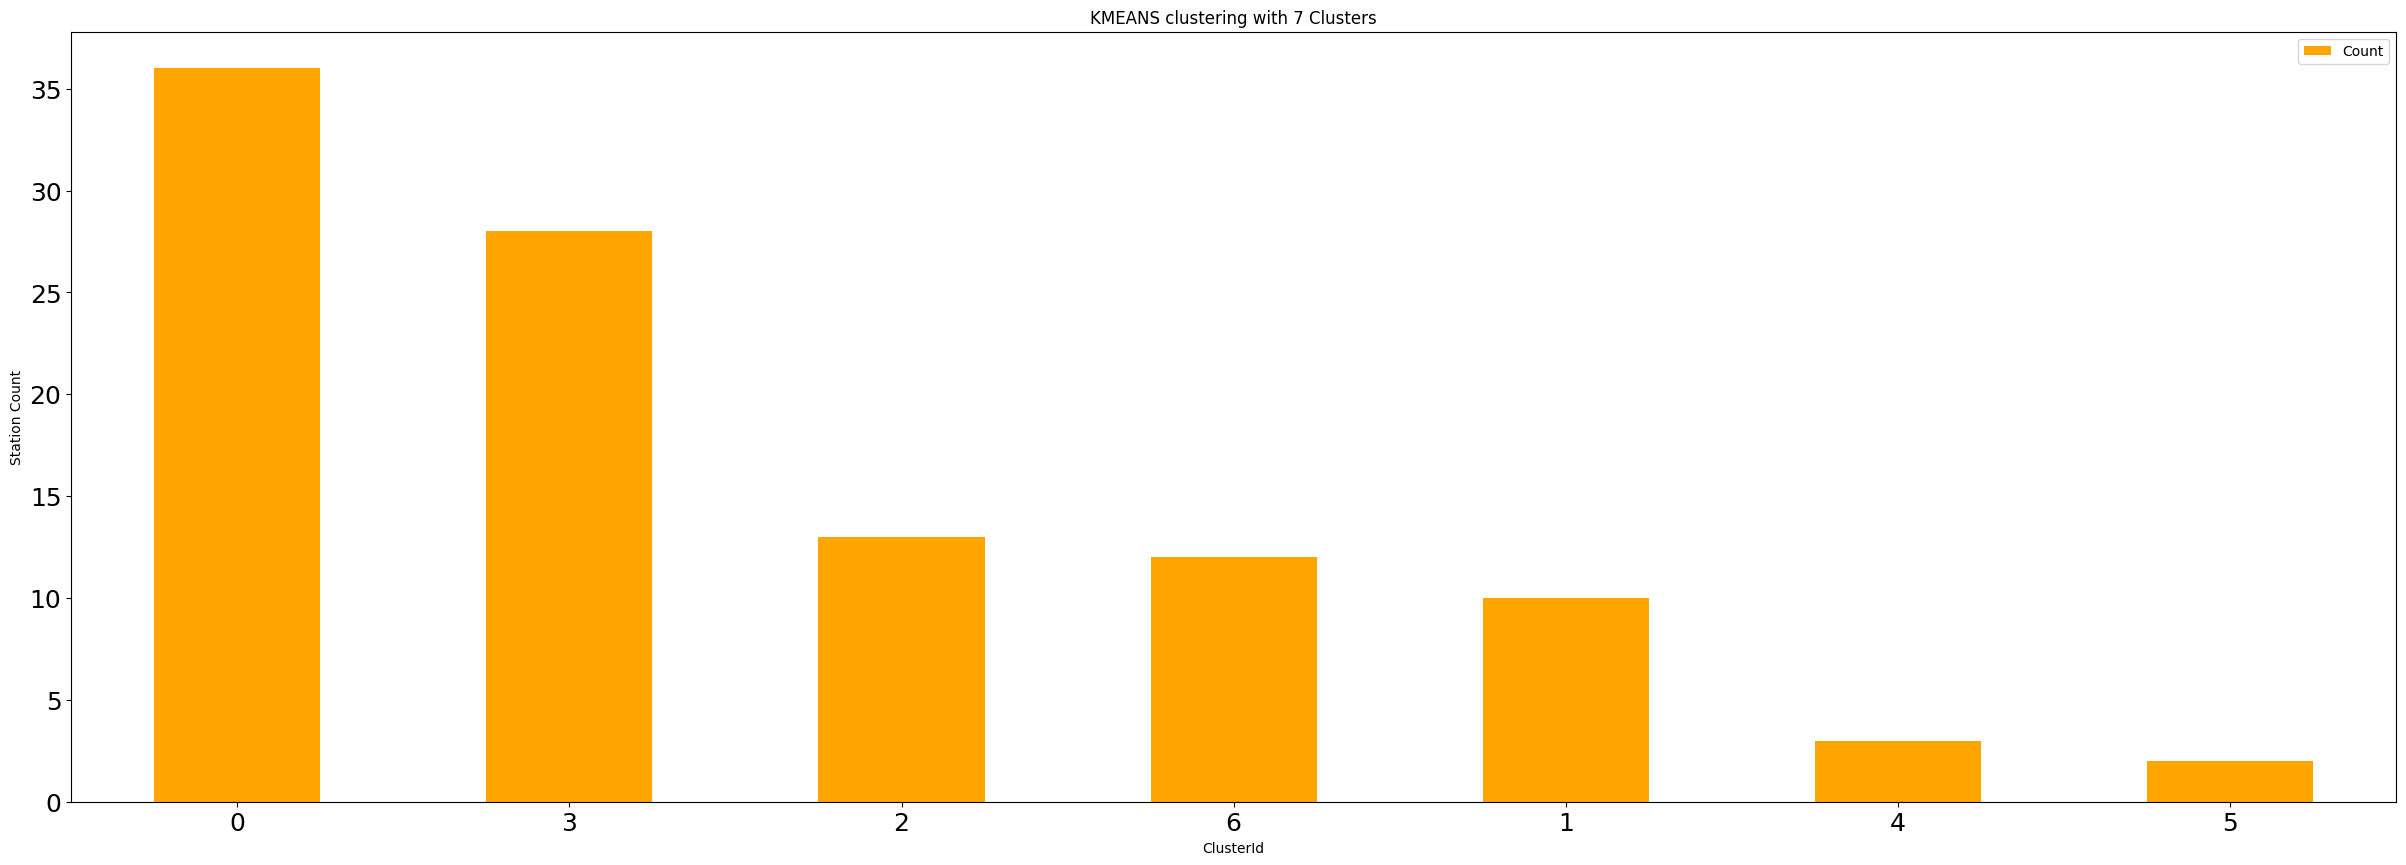

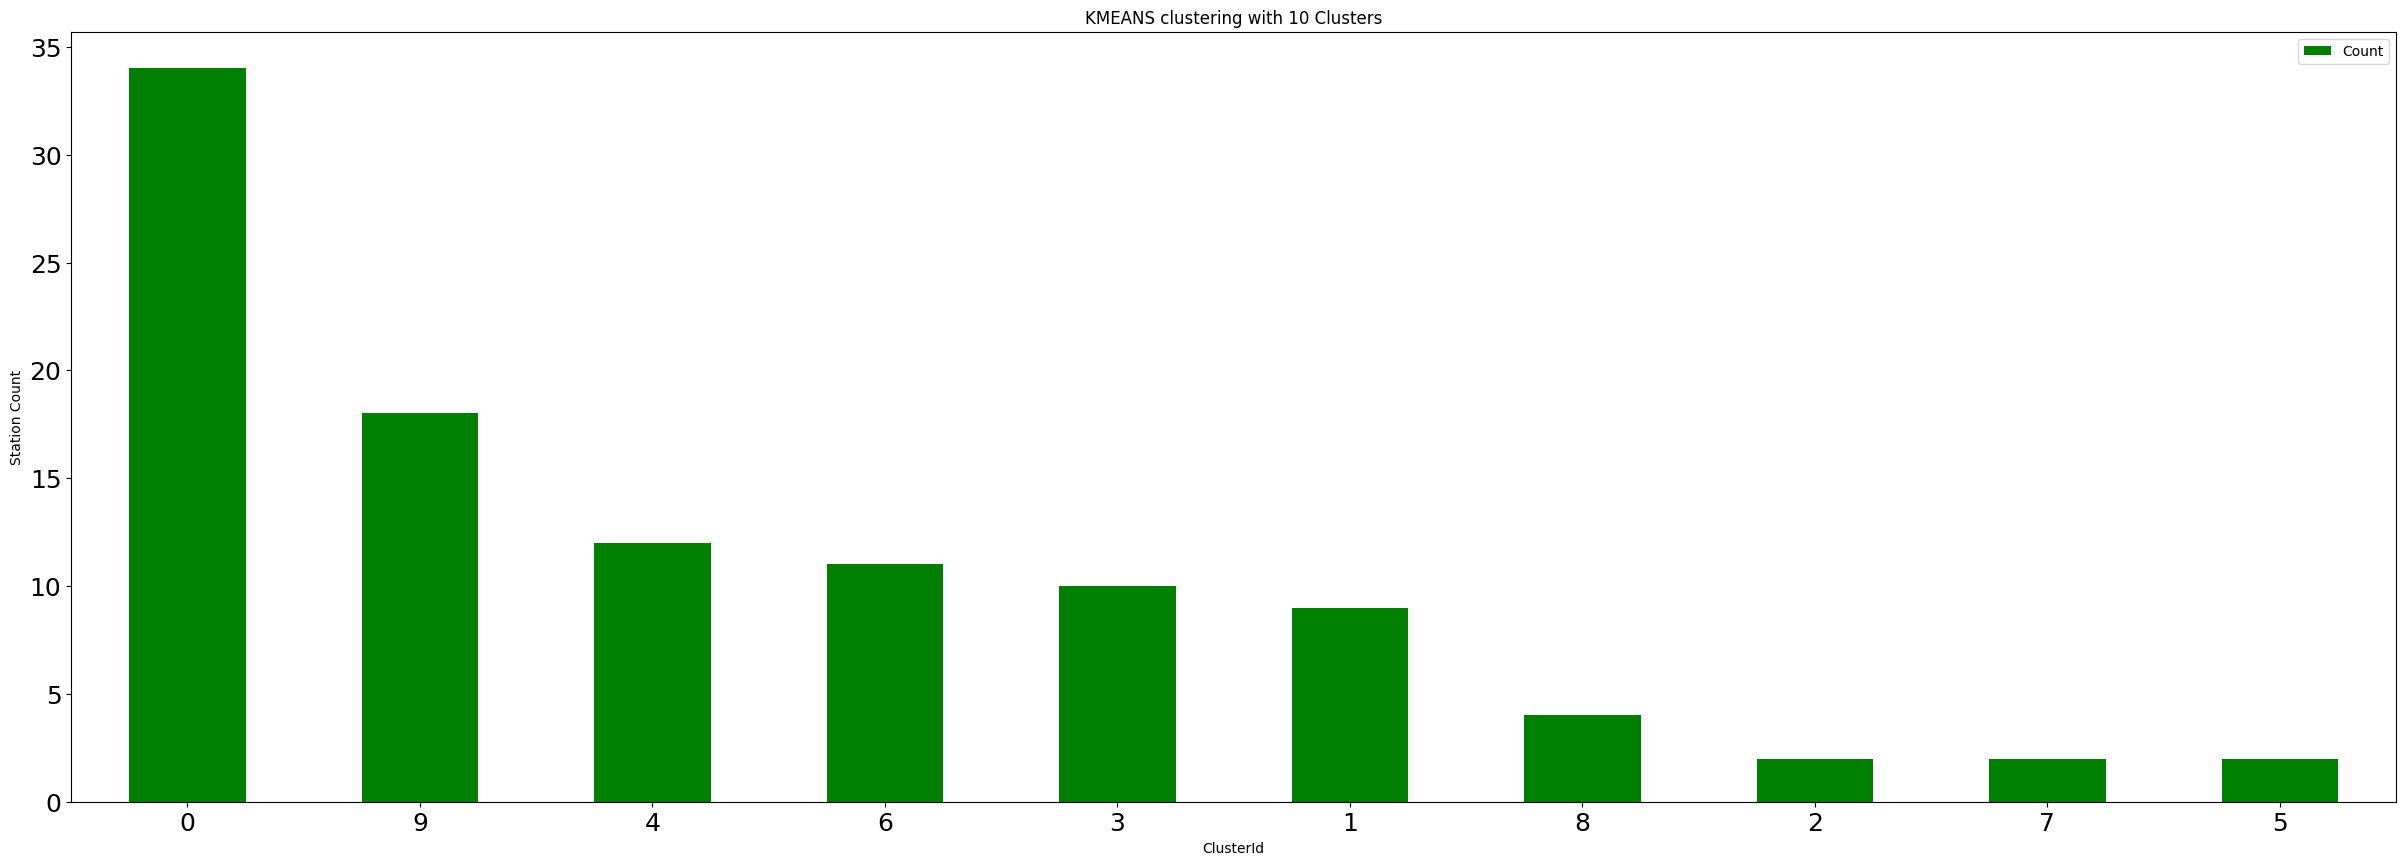

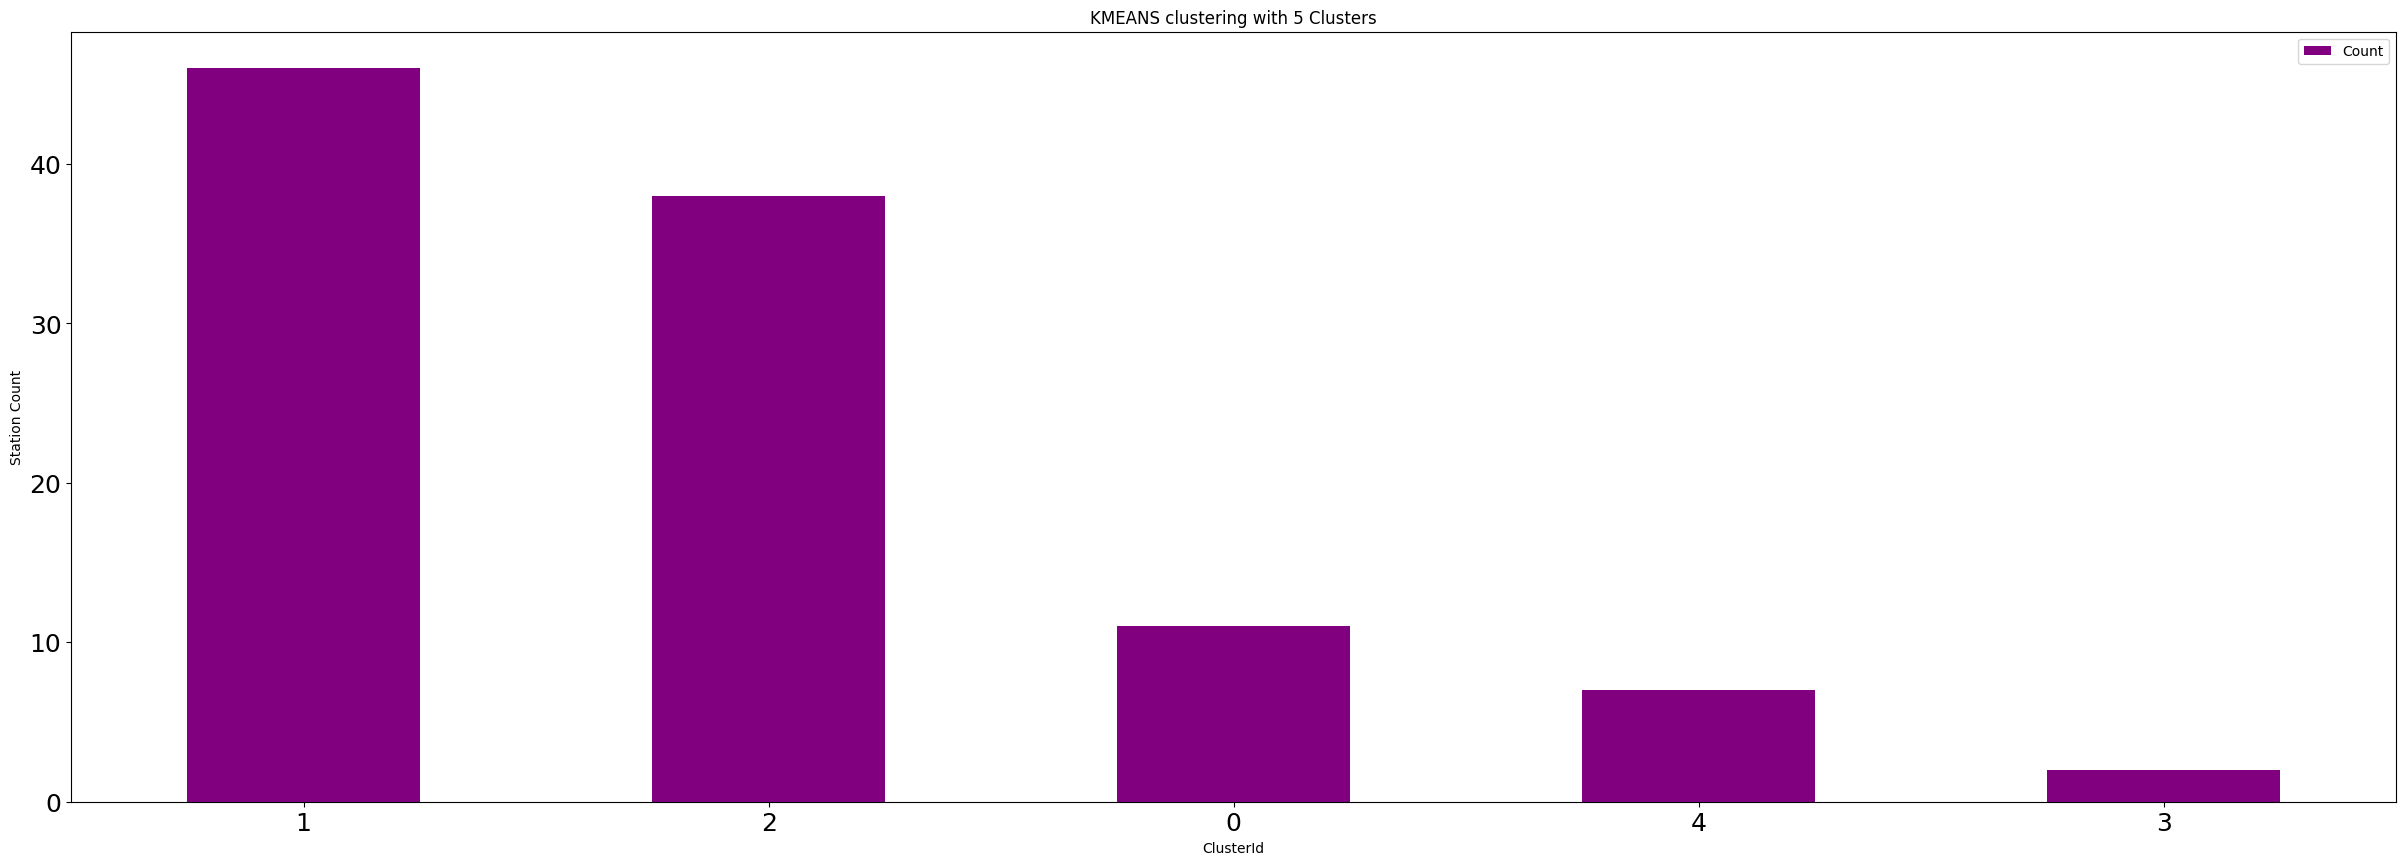

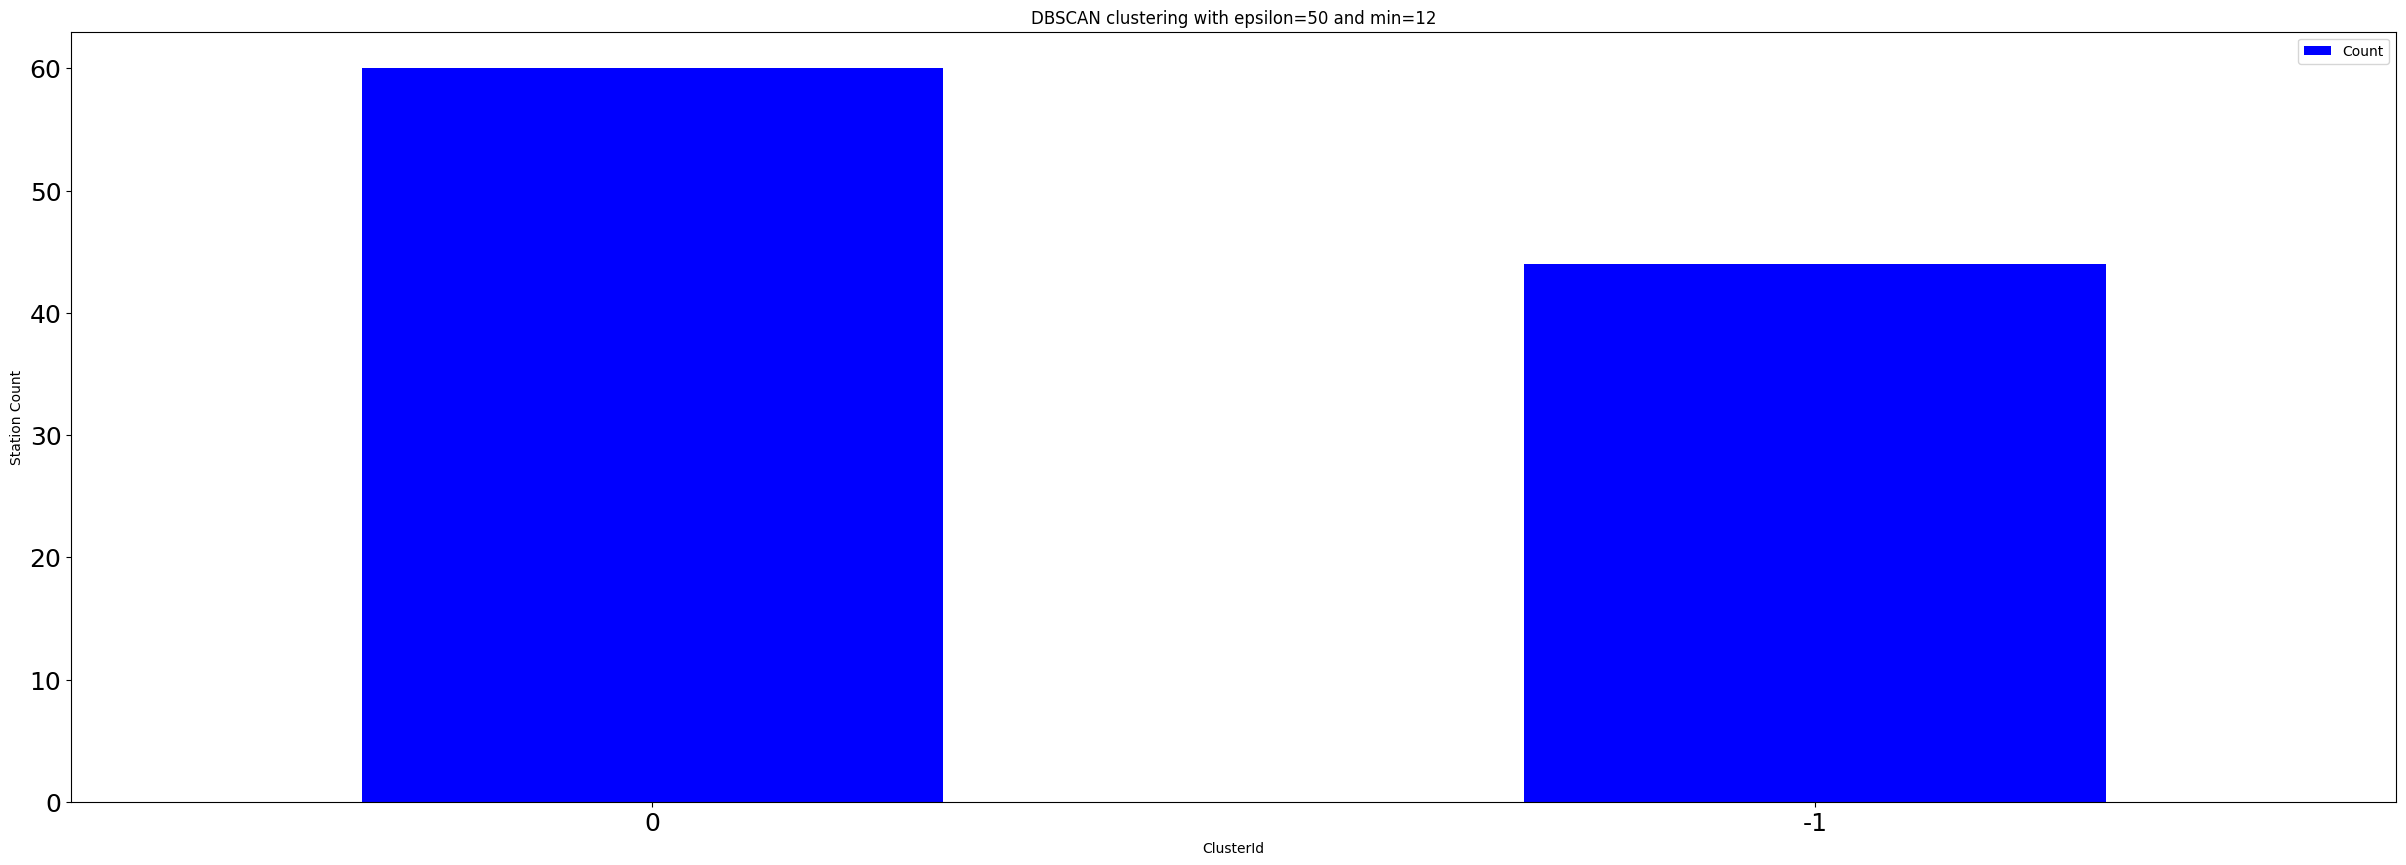

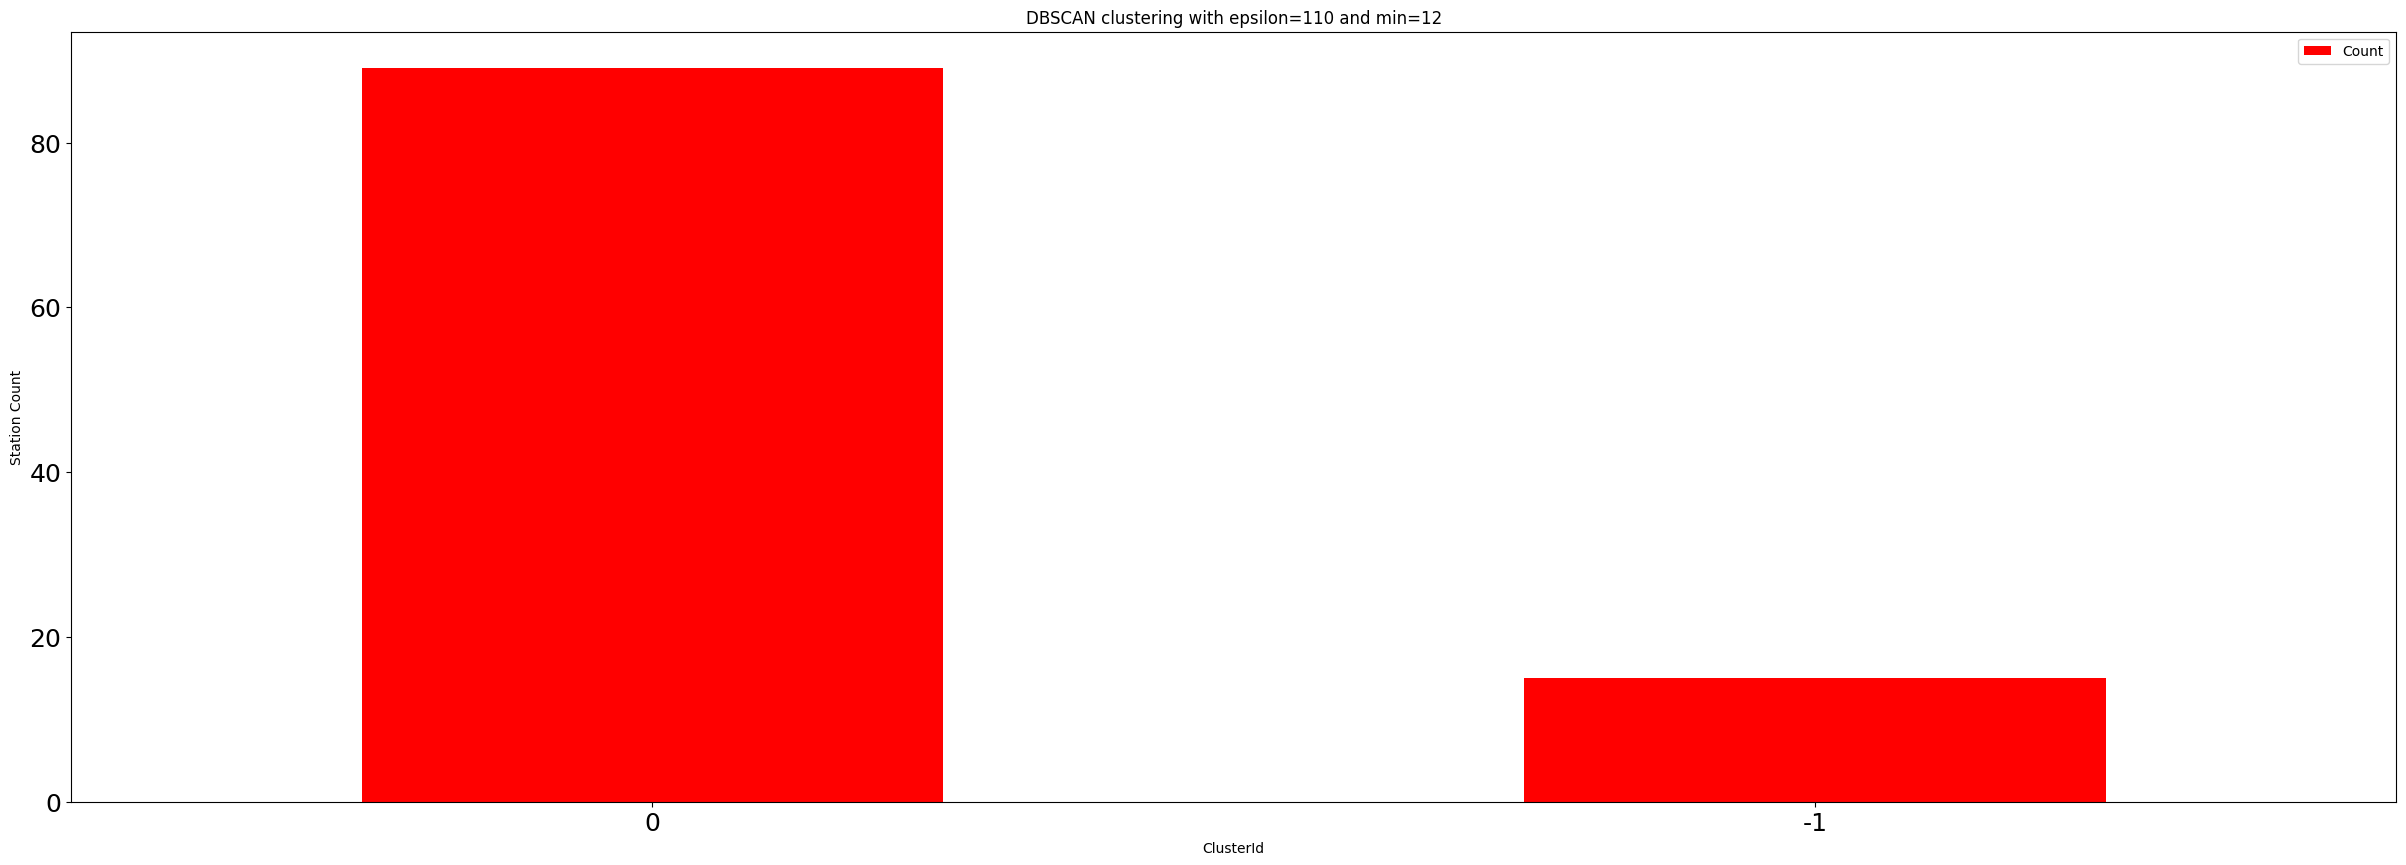

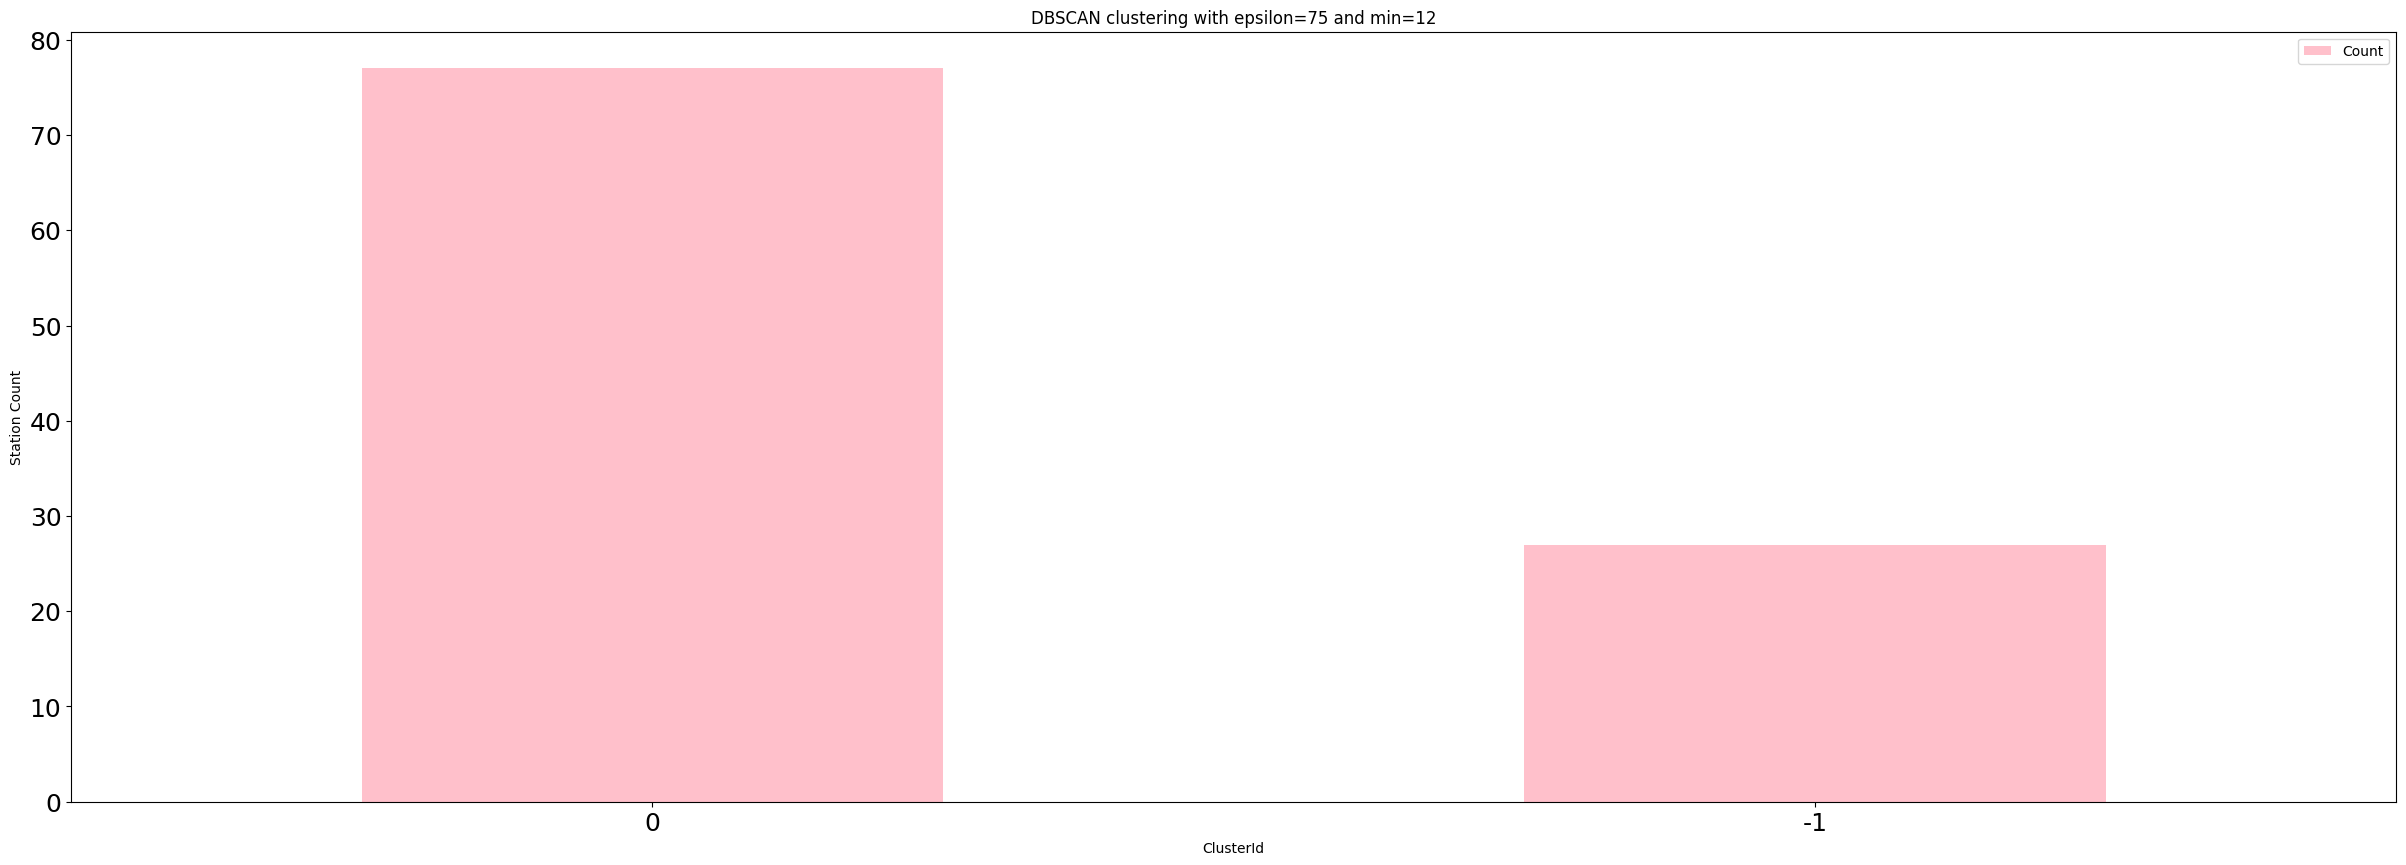

In [16]:
def make_plot(t, c, tit):
    keys = defaultdict(int)
    for n in t:
        keys[n]+=1

    ranks = sorted(keys.items(), key=lambda pair: pair[1], reverse=True)
    print(ranks)
    x=[]
    y=[]
    for tup in ranks:
        x.append(tup[0])
        y.append(tup[1])

    curDf = pd.DataFrame({'clusterId': x, 'Count':y})
    ax = curDf.plot.bar(x='clusterId', y='Count', rot=0, figsize=(30,10), title=tit,
                        fontsize=18, xlabel='ClusterId',ylabel='Station Count', color=c)
make_plot(k1, 'orange', 'KMEANS clustering with 7 Clusters')
make_plot(k2, 'green','KMEANS clustering with 10 Clusters')
make_plot(k3, 'purple','KMEANS clustering with 5 Clusters')
make_plot(k4, 'blue','DBSCAN clustering with epsilon=50 and min=12')
make_plot(k5, 'red','DBSCAN clustering with epsilon=110 and min=12')
make_plot(k6, 'pink','DBSCAN clustering with epsilon=75 and min=12')

### Task 4.3

Based on my analysis, I determined that the optimal algorithim for cluster analysis on the Q3 bike data to be Kmeans clustering with 7 clusters. I came to this conclusion by using the Elbow Method to evaluate K values up to 30+ clusters. The Elbow Method involves calculating the sum of squared errors within clusters for each value of k, The goal is to minimize the sum of squared errors while still considering the cost of adding clusters. This optimization involves creating a plot of the sum of squared errors within clusters for a consistent range of k-values, and finding the point where the change in error diminishes as k increases, which looks like an elbow on the graph. Below is the results from the elbow method which lead me to beleive an optimal value for k was somewhere between 7 and 10, but upon graphical inspection in 4.2 plot1 and plot2, I decided plot1 with 7 clusters was more balanced and consistent, leading to my conclusion that 7 is probably the better choice. 
I had very little success when using the DBSCAN algorithim, I used 12 as the minimum points as it is two times the number of dimensions in the data, when chooisng my epsilon value, I used the elbow method again but this time calculating the distance each datapoint was from its 12th nearest neighbor, and sorted the plot, to generate the elbow plot. The code I used to generate the DBSCAN elbow plot was taken and adapted from https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd. I found an ideal epsilon value would be somewhere between 50-110 , but upon actually testing these values I had no success creating a diverse cluster plot. DBSCAN typically works well for irregular and noisy data where determining, as it does not require an optimal k value like in Kmeans. Since our data was fairly consistent with only a few massive outliers, a Kmeans cluster was adequate and fairly easy to optimize.

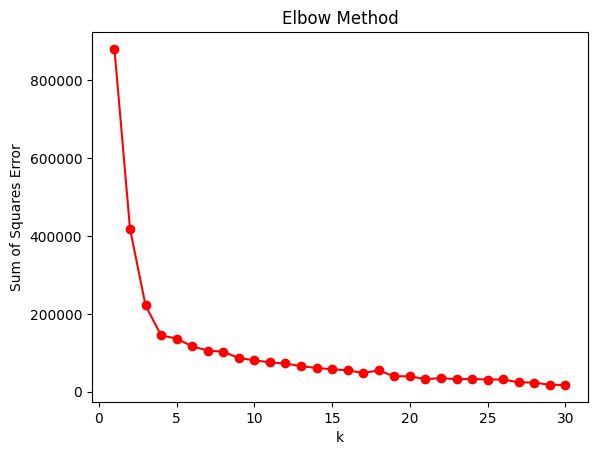

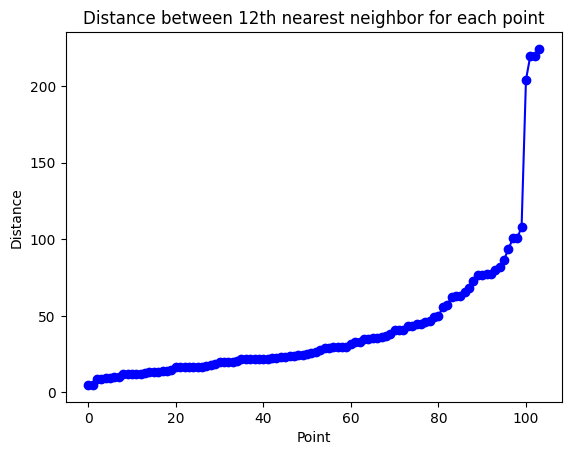

In [17]:
#ELBOW METHOD
data = matrix
k = [i for i in range(1,31)]
e = []
for i in range(1,31):
  curK = KMeans(n_clusters=i)
  curK.fit(data)
  prediction = curK.predict(data)
  center = curK.cluster_centers_
  curError = 0
  for index, value in enumerate(data):
    c = center[prediction[index]]
    pred = data[index,0]-c[0]
    act = data[index,1]-c[1]
    sofsqu = (pred**2)+(act**2)
    curError+=sofsqu 
  e.append(curError)
plt.plot(k,e, 'o-', color='red')
plt.xlabel('k')
plt.ylabel('Sum of Squares Error')
plt.title('Elbow Method')
plt.show()
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(matrix)
distances, indices = neighbors_fit.kneighbors(matrix)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances, 'o-', color='blue')
plt.xlabel('Point')
plt.ylabel('Distance')
plt.title('Distance between 12th nearest neighbor for each point')
plt.show()
